In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [21]:
df_stores = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/stores.csv")
df_transactions = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/transactions.csv")
df_oil = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/oil.csv")
df_holidays = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv")
df_test = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv")
df_train = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv")

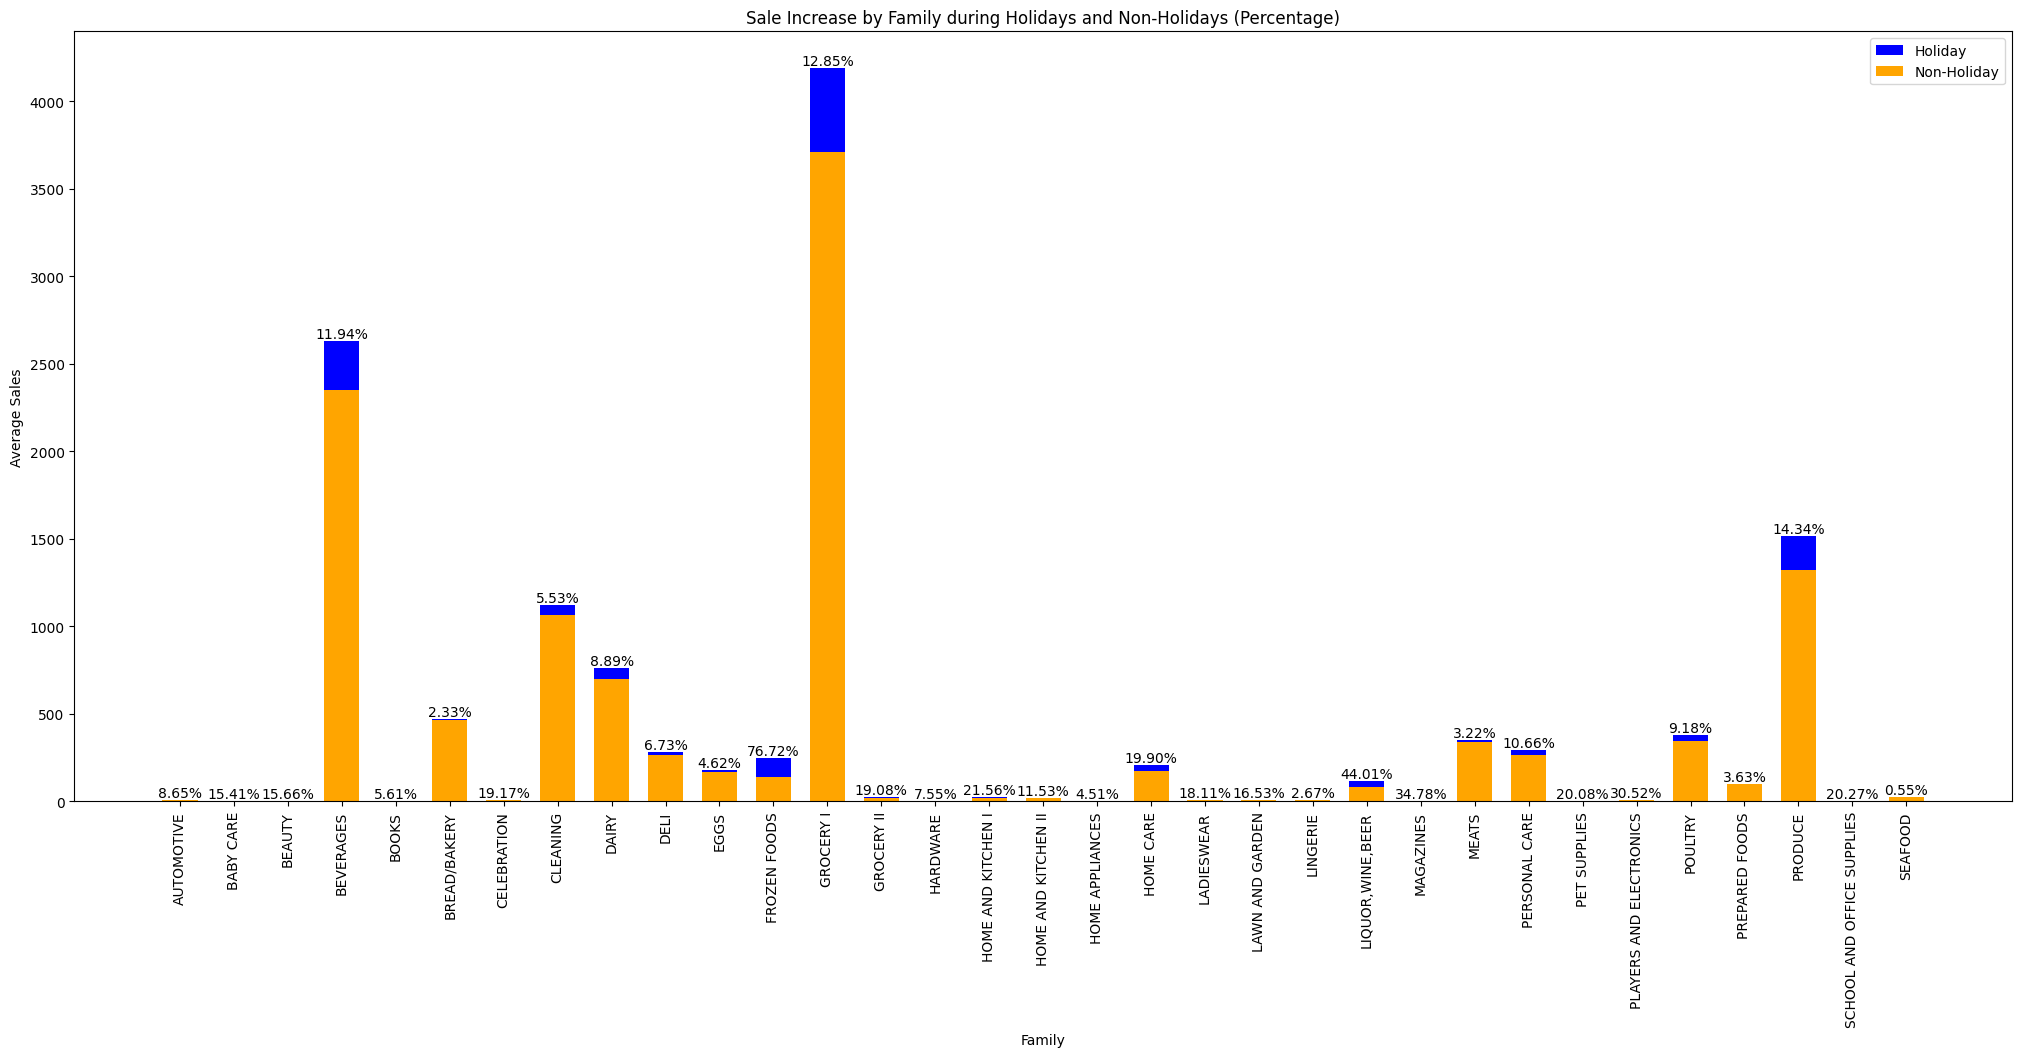

In [22]:
import matplotlib.pyplot as plt

# Merge df_train and df_holidays on the "date" column
merged_df = df_train.merge(df_holidays, on="date", how="left")

# Filter rows where it is a holiday
holiday_sales = merged_df[merged_df["type"].notna()]

# Filter rows where it is not a holiday
non_holiday_sales = merged_df[merged_df["type"].isna()]

# Group by the "family" column and calculate the average sales during holidays
holiday_sales_grouped = holiday_sales.groupby("family")["sales"].mean().reset_index()

# Group by the "family" column and calculate the average sales when it's not a holiday
non_holiday_sales_grouped = non_holiday_sales.groupby("family")["sales"].mean().reset_index()

# Merge the holiday and non-holiday data on the "family" column
combined_sales = holiday_sales_grouped.merge(non_holiday_sales_grouped, on="family", suffixes=("_Holiday", "_NonHoliday"))

# Calculate the percentage difference between holiday and non-holiday sales
combined_sales["PercentageDifference"] = ((combined_sales["sales_Holiday"] - combined_sales["sales_NonHoliday"]) / combined_sales["sales_NonHoliday"]) * 100

# Create a bar graph to visualize the sale increase during holidays and non-holidays
plt.figure(figsize=(25, 10))
bar_width = 0.65
index = range(len(combined_sales))

# Plot holiday sales in blue
plt.bar(index, combined_sales["sales_Holiday"], label="Holiday", color="blue", width=bar_width)

# Plot non-holiday sales in orange
plt.bar(index, combined_sales["sales_NonHoliday"], label="Non-Holiday", color="orange", width=bar_width)

# Add labels for the percentage difference
for i, diff_percentage in enumerate(combined_sales["PercentageDifference"]):
    plt.text(i, max(combined_sales["sales_Holiday"].iloc[i], combined_sales["sales_NonHoliday"].iloc[i]),
             f"{diff_percentage:.2f}%", ha="center", va="bottom")

plt.xlabel("Family")
plt.ylabel("Average Sales")
plt.title("Sale Increase by Family during Holidays and Non-Holidays (Percentage)")
plt.xticks(index, combined_sales["family"], rotation=90)
plt.legend()
plt.show()


Year 2013: GROCERY I (58339929.0), BEVERAGES (21777880.0), CLEANING (17514515.0)
Year 2014: GROCERY I (65666790.758), BEVERAGES (41050432.0), PRODUCE (23512527.790476)
Year 2015: GROCERY I (76228539.004), BEVERAGES (48425895.0), PRODUCE (25595844.556458)
Year 2016: GROCERY I (86086538.966), BEVERAGES (61747687.0), PRODUCE (44248100.44316)
Year 2017: GROCERY I (57140937.158), BEVERAGES (43952592.0), PRODUCE (29275406.886366)



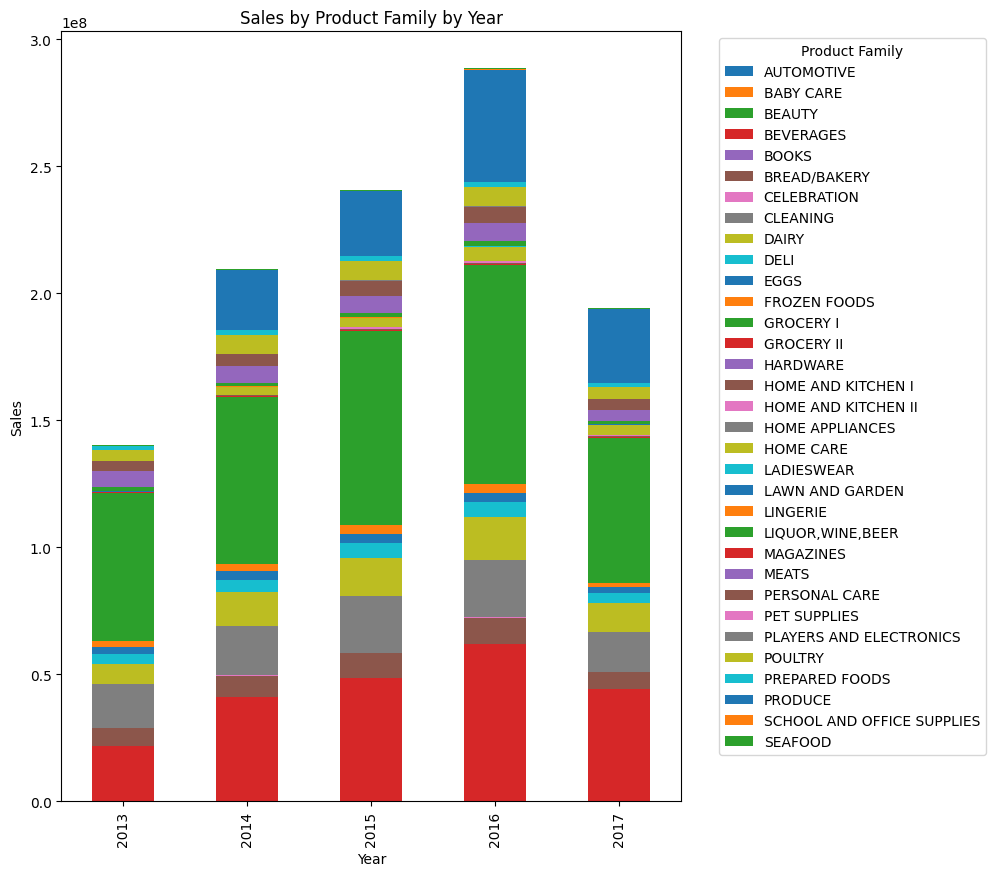

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have df_train loaded and processed

# Convert the "date" column to datetime if it's not already in the correct format
df_train['date'] = pd.to_datetime(df_train['date'])

# Extract year from the "date" column
df_train['year'] = df_train['date'].dt.year

# Group by year and family, and sum the sales for each combination
sales_by_year_family = df_train.groupby(['year', 'family'])['sales'].sum().reset_index()

# Pivot the data to prepare for the clustered column chart
pivot_sales = sales_by_year_family.pivot(index='year', columns='family', values='sales')

# Plot the clustered column chart
ax = pivot_sales.plot(kind='bar', stacked=True, figsize=(8, 10))
plt.title('Sales by Product Family by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Product Family', bbox_to_anchor=(1.05, 1), loc='upper left')

# Initialize the bottom_text variable
bottom_text = ""

# Loop through each year
for year in pivot_sales.index:
    top_3 = pivot_sales.loc[year].nlargest(3)
    bottom_text += f"Year {year}: {', '.join([f'{family} ({sales})' for family, sales in top_3.items()])}\n"

# Print the top 3 sales of each family at the bottom
print(bottom_text)

plt.show()


Year 2013: GROCERY I (58339929.0), BEVERAGES (21777880.0), CLEANING (17514515.0)

Year 2013: GROCERY I (58339929.0), BEVERAGES (21777880.0), CLEANING (17514515.0)
Year 2014: GROCERY I (65666790.758), BEVERAGES (41050432.0), PRODUCE (23512527.790476)

Year 2013: GROCERY I (58339929.0), BEVERAGES (21777880.0), CLEANING (17514515.0)
Year 2014: GROCERY I (65666790.758), BEVERAGES (41050432.0), PRODUCE (23512527.790476)
Year 2015: GROCERY I (76228539.004), BEVERAGES (48425895.0), PRODUCE (25595844.556458)

Year 2013: GROCERY I (58339929.0), BEVERAGES (21777880.0), CLEANING (17514515.0)
Year 2014: GROCERY I (65666790.758), BEVERAGES (41050432.0), PRODUCE (23512527.790476)
Year 2015: GROCERY I (76228539.004), BEVERAGES (48425895.0), PRODUCE (25595844.556458)
Year 2016: GROCERY I (86086538.966), BEVERAGES (61747687.0), PRODUCE (44248100.44316)

Year 2013: GROCERY I (58339929.0), BEVERAGES (21777880.0), CLEANING (17514515.0)
Year 2014: GROCERY I (65666790.758), BEVERAGES (41050432.0), PRODUCE (

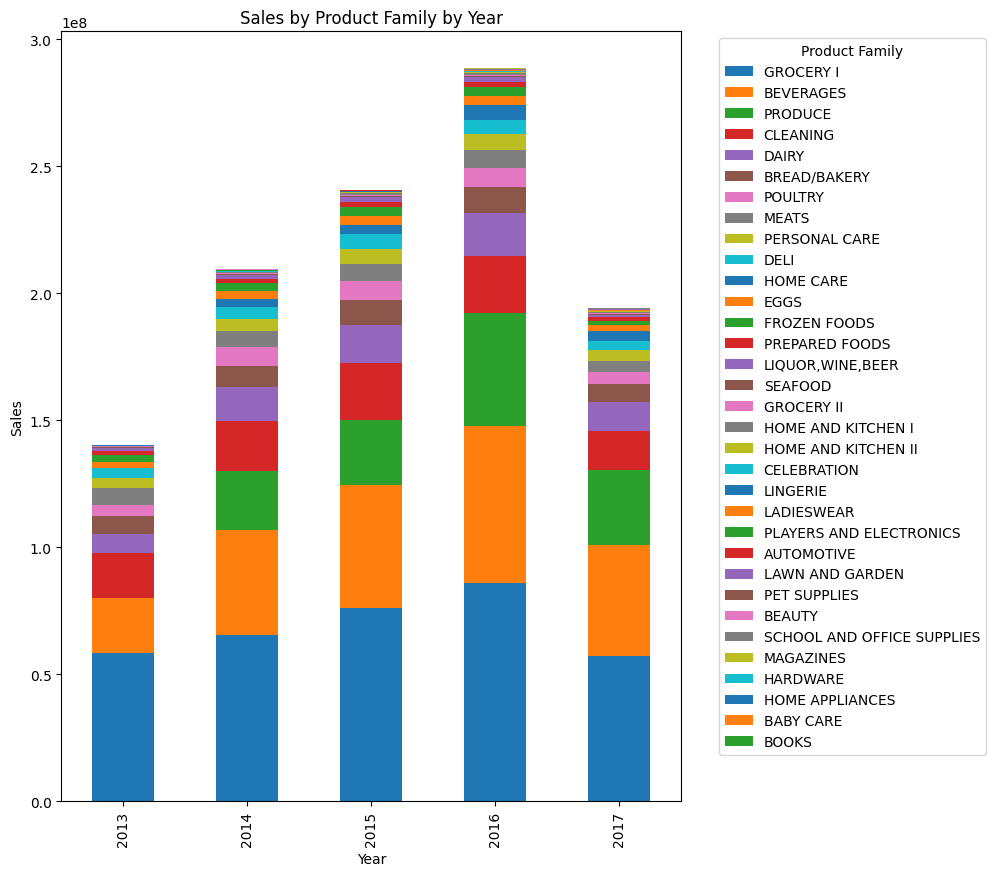

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


df_train['date'] = pd.to_datetime(df_train['date'])

df_train['year'] = df_train['date'].dt.year


sales_by_year_family = df_train.groupby(['year', 'family'])['sales'].sum().reset_index()


pivot_sales = sales_by_year_family.pivot(index='year', columns='family', values='sales')


pivot_sales = pivot_sales[pivot_sales.sum().sort_values(ascending=False).index]


ax = pivot_sales.plot(kind='bar', stacked=True, figsize=(8, 10))
plt.title('Sales by Product Family by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Product Family', bbox_to_anchor=(1.05, 1), loc='upper left')


bottom_text = ""
for year in pivot_sales.index:
    top_3 = pivot_sales.loc[year].nlargest(3)
    bottom_text += f"Year {year}: {', '.join([f'{family} ({sales})' for family, sales in top_3.items()])}\n"
    print(bottom_text)

plt.show()
